In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Summarry

### This data represents the information about the users who have purchased Amazon Prime subscription. 
### Amazon Prime is a paid subscription service of Amazon which is available in various countries and gives users access to additional services otherwise unavailable or available at a premium to other Amazon customers. 
### The Amazon Prime Users Dataset contains information about 2500 fictional users of the Amazon Prime subscription service. Each entry in the dataset includes details such as the user's name, email address, location, subscription plan, payment information, and engagement metrics. Additionally, demographic data such as gender and date of birth are provided, along with user preferences such as favorite genres and devices used to access the platform.
### The dataset aims to represent a diverse range of Prime users, including different demographics, subscription plans, and usage patterns. It is designed to facilitate analysis and insights into user behavior, preferences, and interactions with the Amazon Prime platform. Researchers and analysts can use this dataset to study trends, conduct targeted marketing campaigns, and improve user experience on the platform.

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\amazon_prime_users.csv")
df.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


# Data Manipulations

### Before conducting exploratory data analysis (EDA), it's essential to perform data manipulations to update the data types of specific columns. This ensures seamless EDA operations and facilitates accurate analysis. We'll focus on updating the data types of some of the columns to ensure consistency and enhance our analytical capabilities.

In [4]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%Y-%m-%d')
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'], format='%Y-%m-%d')
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'], format='%Y-%m-%d')

### There are a total of 2500 individual users in our dataset. This diverse user base provides a wealth of information for analysis and insights into user behavior and preferences.

In [5]:
Total_Users = df['User ID'].count()
Total_Users

2500

### Among our users, we've identified a total of 1260 males and 1240 females. This gender distribution provides a balanced perspective for our analysis, helping us understand the diverse needs and behaviors of both male and female users

Text(0.5, 1.0, 'Users by Gender')

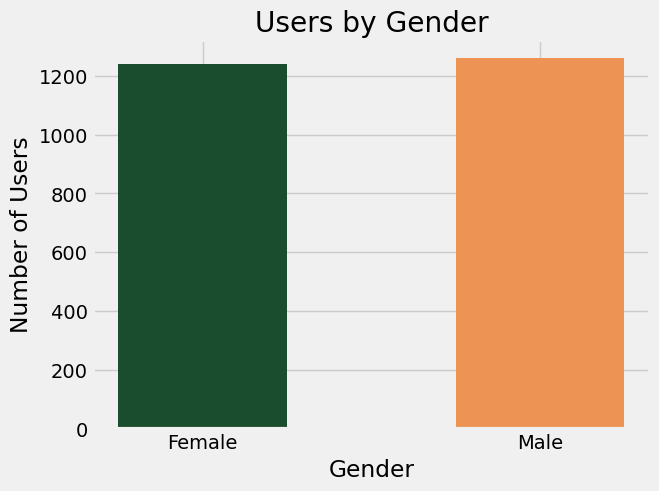

In [6]:
plt.style.use('fivethirtyeight')
colors = ['#1A4D2E','#ED9455']
res = pd.DataFrame((df.groupby('Gender')['User ID'].count()))
res.reset_index(inplace = True)
plt.bar(res['Gender'],res['User ID'],color = colors,width = 0.5)

plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Users by Gender')

### We transformed the 'Date of Birth' column into datetime format to accurately calculate users' ages based on the current date. Using these ages, we categorized users into five age groups: 0-18, 18-40, 40-60, 60-80, and 80-100 years. This categorization provides a clearer understanding of our user demographics. Finally, we removed the 'Current_date' column to streamline the dataframe.

In [8]:
from datetime import datetime 
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%Y-%m-%d')
df['Current_date'] = pd.to_datetime('today')
df['Age'] = (df['Current_date'] - df['Date of Birth']).astype('<m8[Y]')
bins = [0,18,40,60,80,100]
labels = ['0-18','18-40','40-60','60-80','80-100']

df['Age Group'] = pd.cut(df['Age'],bins = bins, labels = labels,right = False)
df.drop('Current_date',axis =1 , inplace = True)

### The horizontal bar chart illustrates the distribution of users across different age groups. We observed the highest number of users in the 18-40 age group, followed by a decrease in user count as the age group increases. This suggests that our platform is most popular among younger demographics, with a gradual decline in user engagement among older age groups.

Text(0.5, 1.0, 'Users by Age Group')

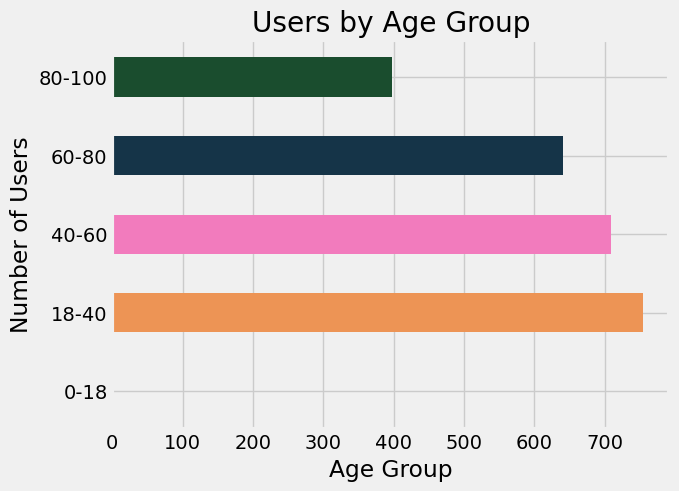

In [9]:
res = pd.DataFrame(df.groupby('Age Group')['User ID'].count())
res.reset_index(inplace = True)
plt.style.use('fivethirtyeight')
colors = ['#1A4D2E','#ED9455','#F27BBD','#153448']
plt.barh(res['Age Group'],res['User ID'],color = colors,height = 0.5)
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.title('Users by Age Group')

### The pie chart illustrates the distribution of users based on their subscription plans, categorized into Monthly and Yearly plans. We observed that the Yearly plan is more popular, representing 50.8% of the total users, while the Monthly plan comprises the remaining 49.2%. This suggests a significant preference for the convenience and potential cost savings offered by the Yearly subscription among our user base.

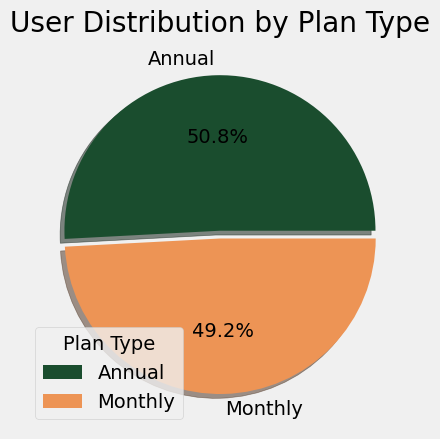

In [10]:
plt.style.use('fivethirtyeight')
res = pd.DataFrame(df.groupby('Subscription Plan').size())
res = res.reset_index()
colors = ['#1A4D2E','#ED9455']
myexplode = [0.025, 0.025]
plt.pie(res[0], labels=res['Subscription Plan'], autopct='%1.1f%%',colors = colors,explode = myexplode,shadow=True)
plt.legend(title = 'Plan Type')
plt.title('User Distribution by Plan Type')
plt.show()

### The line plot illustrates the number of users who took subscriptions in each month over a four-month period. The x-axis represents the months from January to April. 
### We observed fluctuations in user subscriptions, with January having the highest count at 773 users, followed by March with 744 users, February with 651 users, and April with 322 users. This analysis provides insights into the distribution of new subscriptions over the specified months.

Text(0.5, 1.0, 'Subscriptions by Month')

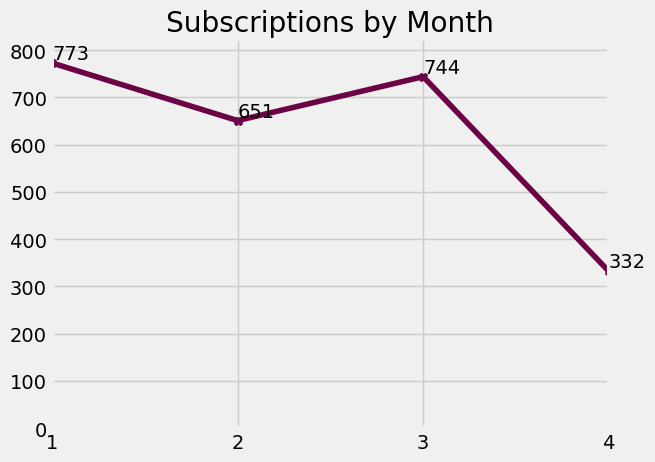

In [12]:
res = pd.DataFrame(df.groupby(df['Membership Start Date'].dt.month)['User ID'].count())
res.reset_index(inplace = True)
plt.style.use('fivethirtyeight')
plt.plot(res['Membership Start Date'],res['User ID'],marker = 'X',color = '#6C0345')
# Set x-axis limits
plt.xlim(res['Membership Start Date'].min(), res['Membership Start Date'].max())
# Set x-axis ticks to integer values representing months
plt.xticks(range(1, len(res) + 1), range(1, len(res) + 1))
# Rotate x-axis labels for better readability
for x, y in zip(res['Membership Start Date'], res['User ID']):
    plt.text(x, y, f'{y}', ha='left', va='bottom') 
plt.xticks()
# Set y-axis limits
plt.ylim(0, res['User ID'].max() + 50)
plt.title('Subscriptions by Month')

### The bar chart illustrates the popularity of different payment methods among users. We have three payment methods: Amex, Mastercard, and Visa. 
### Mastercard is the most popular payment method, with 856 users, followed closely by Visa with 838 users, and Amex with 806 users. This analysis provides insights into the preferences of users regarding payment methods on our platform

In [13]:
res = pd.DataFrame(df.groupby('Payment Information')['User ID'].count())
res.reset_index(inplace = True)
res = res.sort_values(by='User ID', ascending=True)

Text(0.5, 1.0, 'Payment Method Popularity')

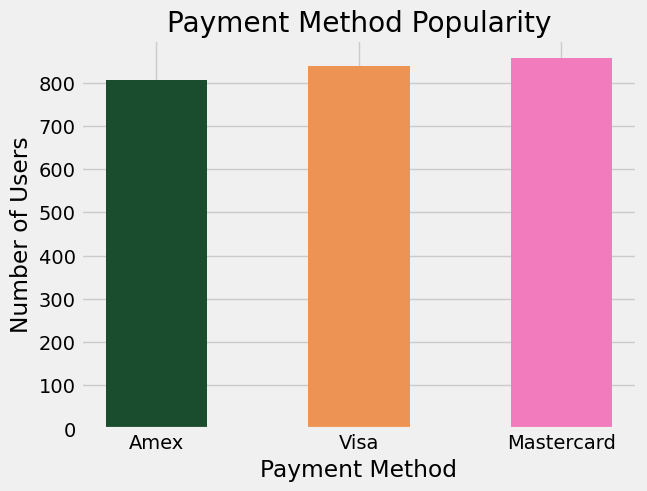

In [14]:
plt.style.use('fivethirtyeight')
colors = ['#1A4D2E','#ED9455','#F27BBD','#153448']
plt.bar(res['Payment Information'],res['User ID'],color = colors,width = 0.5)
plt.xlabel('Payment Method')
plt.ylabel('Number of Users')
plt.title('Payment Method Popularity')

### The pie chart illustrates the distribution of users based on their purchase history categories, which include Books, Clothing, and Electronics. 
### Among these categories, Books is the most popular, representing 34% of the total users, followed by Electronics with 33.9%, and Books with 32.1%. This analysis sheds light on user engagement levels with our platform across different product categories.

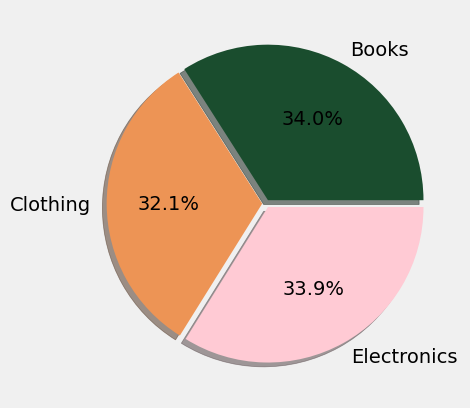

In [15]:
plt.style.use('fivethirtyeight')
res = pd.DataFrame(df.groupby('Purchase History').size())
res = res.reset_index()
colors = ['#1A4D2E','#ED9455','#FFCAD4']
myexplode = [0.025, 0.025,0.025]
plt.pie(res[0], labels=res['Purchase History'], autopct='%1.1f%%',colors = colors,explode = myexplode,shadow=True)
plt.show()

### - The bar chart displays the top 5 favorite genres among users. 
### - The most popular genre is Horror, with 383 users, closely followed by Action with 380 users. Romance, Drama, and Comedy are also popular, with 368, 361, and 349 users respectively. 
### - This analysis provides insights into the preferred genres of our user base, with Horror and Action leading the list

Text(0.5, 1.0, 'Top 5 Favourite Genres')

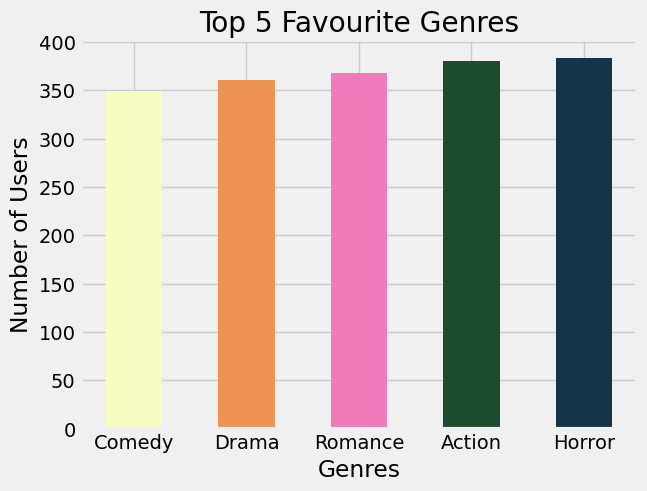

In [16]:
res = pd.DataFrame(df.groupby('Favorite Genres')['User ID'].count())
res.reset_index(inplace = True)
res = res.sort_values(by='User ID', ascending=True)
res = res.tail(5)

plt.style.use('fivethirtyeight')
colors = ['#F6FDC3','#ED9455','#F27BBD','#1A4D2E','#153448']
plt.bar(res['Favorite Genres'],res['User ID'],color = colors,width = 0.5)
plt.xlabel('Genres')
plt.ylabel('Number of Users')
plt.title('Top 5 Favourite Genres')

### - The horizontal bar chart illustrates the distribution of users based on their engagement metrics: Low, Medium, and High. 
### - We observed that the majority of users fall into the 'High' engagement category, with 845 users, followed closely by 'Medium' engagement with 834 users. The 'Low' engagement category has the lowest number of users, with 821. 
### - This analysis provides insights into the engagement levels of our user base, with a significant portion showing high levels of engagement.

Text(0.5, 1.0, 'Engangement Count')

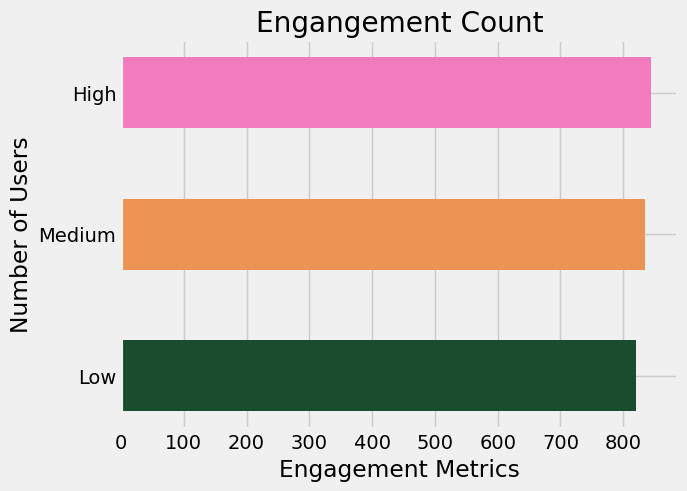

In [17]:
res = pd.DataFrame(df.groupby('Engagement Metrics')['User ID'].count())
res.reset_index(inplace = True)
res = res.sort_values(by='User ID', ascending=True)

plt.style.use('fivethirtyeight')
colors = ['#1A4D2E','#ED9455','#F27BBD','#153448']
plt.barh(res['Engagement Metrics'],res['User ID'],color = colors,height = 0.5)
plt.xlabel('Engagement Metrics')
plt.ylabel('Number of Users')
plt.title('Engangement Count')

Text(0.5, 1.0, 'Ratings by Users')

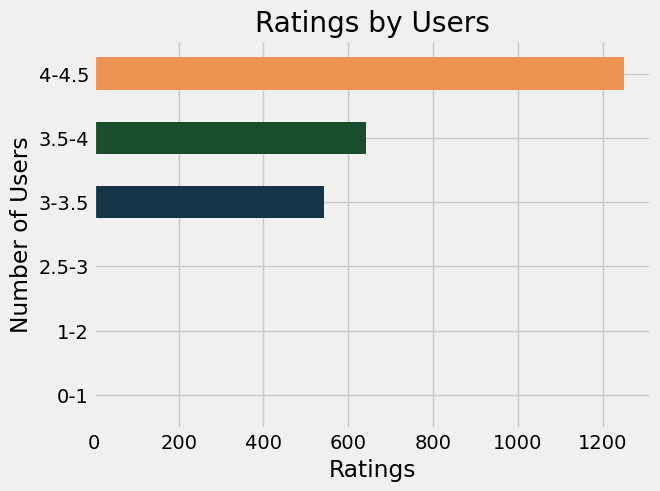

In [18]:
bins = [0,1,2,3,3.5,4,4,5]
labels = ['0-1','1-2','2.5-3','3-3.5','3.5-4','4-4.5']

df['Rating Bin'] = pd.cut(df['Feedback/Ratings'],bins = bins, labels = labels,right = False,duplicates= 'drop')

res = pd.DataFrame(df.groupby('Rating Bin')['User ID'].count())
res.reset_index(inplace = True)

plt.style.use('fivethirtyeight')
colors = ['#1A4D2E','#ED9455','#F27BBD','#153448']
plt.barh(res['Rating Bin'],res['User ID'],color = colors,height = 0.5)
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.title('Ratings by Users')

### The horizontal bar chart illustrates the distribution of users based on their ratings. Ratings are grouped into bins, with intervals from 0-1, 1-2, 2.5-3, 3-3.5, 3.5-4, and 4-4.5. 
### Notably, the majority of users fall into the higher rating categories, with 642 users rated between 3.5 and 4, and a significant number of users, 1251, rated between 4 and 4.5. 
### However, there are no users in the lower rating categories of 0-1, 1-2, and 2.5-3. This analysis provides insights into the distribution of user ratings, highlighting a positive trend with higher ratings dominating."

Text(0.5, 1.0, 'Ratings by Users')

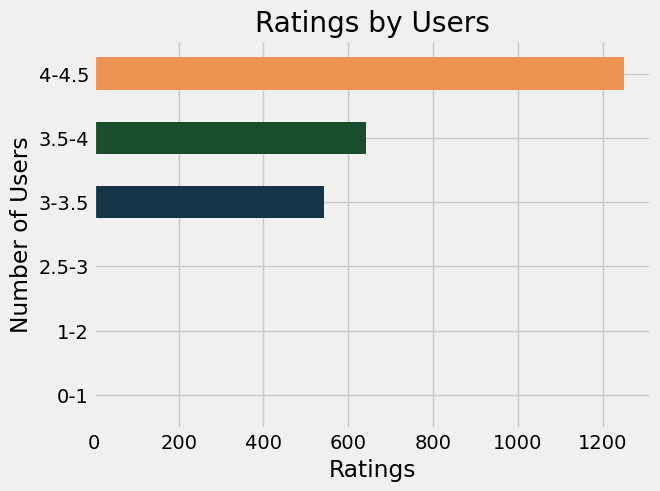

In [19]:
bins = [0,1,2,3,3.5,4,4,5]
labels = ['0-1','1-2','2.5-3','3-3.5','3.5-4','4-4.5']

df['Rating Bin'] = pd.cut(df['Feedback/Ratings'],bins = bins, labels = labels,right = False,duplicates= 'drop')

res = pd.DataFrame(df.groupby('Rating Bin')['User ID'].count())
res.reset_index(inplace = True)

plt.style.use('fivethirtyeight')
colors = ['#1A4D2E','#ED9455','#F27BBD','#153448']
plt.barh(res['Rating Bin'],res['User ID'],color = colors,height = 0.5)
plt.xlabel('Ratings')
plt.ylabel('Number of Users')
plt.title('Ratings by Users')